# Roteiro para Visão computacional:

## Autores:
- Fernando Schettini;
- Rafael Luna;
- Henrique Lyrio;
- Matheus Pires;
- Pedro Barros.


# Transformações Geométricas em Imagens
- Transformações Lineares: Translação, Rotação, Escalonamento;
- Transformações Não Lineares: Distorção e Mapeamento de perspectiva;
- Transformações de Malha: Warpings e deformações.

### Translação
Desloca todos os pontos em uma direção específica e pela mesma distância:

$$
T(x,y) = (x + T,y + T), T \in \mathbb{N}
$$

### Rotação:$^{[1][2]}$

<p style="text-align: center;">
 <img src="imgs/ex_rotation.jpg">
</p>

Rotação consiste em Comum em processamento de imagens, com aplicações em correspondência, alinhamento em imagens. A operação consiste na entrada do ângulo de rotação θ e um ponto $(x_0,y_0)$ em torno do qual a rotação é realizada.

Na transformação, um par de pontos $(x_1,y_1)$ se torna $(x_2,y_2)$ de acordo com a equação:

$$
x_2=cos(θ)*(x_1−x_0)+sin(θ)*(y_1−y_0)
$$
$$
y_2=−sin(θ)*(x_1−x_0)+cos(θ)*(y_1−y_0)
$$

Essas equações são deduzidas por:

<p style="text-align: center;">
 <img src="imgs/deduction_rotation.png" width="1300" height="900">
</p>


### Escalonamento: $^{[3]}$

Escalonamento realiza uma transformação geométrica que pode ser usada para reduzir ou ampliar o tamanho de uma imagem (ou parte de uma imagem).

A **redução de imagem**, comumente conhecida como subamostragem, é realizada por substituição (de um grupo de valores de pixels por um valor de pixel arbitrariamente escolhido dentro desse grupo) ou por interpolação entre os valores de pixels em vizinhanças locais. O **aumento de imagem** é alcançado pela replicação de pixels ou por interpolação.

<p style="text-align: center;">
 <img src="imgs/sub_scaling.png" width="500" height="400">
</p>

<p style="text-align: center;">
 <img src="imgs/upper_scaling.png" width="500" height="400">
</p>

# Criando Video

In [ ]:
import cv2
import subprocess
import urllib.request
import numpy as np
import matplotlib.pyplot as plt

## Pegando Imagem

In [ ]:
url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS-f15u-JiWNGLuBU7f1RCl4qgNUiG3Ok9guA&s"
req = urllib.request.urlopen(url)
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
logo_original = cv2.imdecode(arr, -1) # 'Load it as it is'
print(logo_original.shape)

(259, 194, 3)


## Configurando Video

In [ ]:
FPS = 20
WIDTH, HEIGHT = 194,259
codec = cv2.VideoWriter_fourcc("X", "V", "I", "D")
video_writer = cv2.VideoWriter('output.avi', codec, FPS, (WIDTH, HEIGHT))

frames_count = 0
scale_percent = 100

## Testando criação de vídeo

In [ ]:
# Parametros para texto
position_text = (0, 20)
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 0.85
font_color = (255, 255, 255)
line_type =2

while scale_percent >= 20:
  logo_copy = logo_original.copy()
  new_frame = logo_copy

  # escreve texto na imagem
  cv2.putText(new_frame,
              "Nandin Gomes",
              position_text,
              font,
              font_scale,
              font_color,
              line_type)

  for f in range(FPS):
    video_writer.write(new_frame)
    frames_count += 1
  scale_percent -= 5
video_writer.release()

## Convertendo e exibindo vídeo


In [ ]:
subprocess.call(['ffmpeg', '-i', 'output.avi', 'output.mp4', '-y'])

0

In [ ]:
from IPython.display import Video
Video('output.mp4', embed=True)

# Escala

In [ ]:
FPS = 20
WIDTH, HEIGHT = 194, 259
codec = cv2.VideoWriter_fourcc("X", "V", "I", "D")
video_writer = cv2.VideoWriter('output2.avi', codec, FPS, (WIDTH, HEIGHT))

frames_count = 0
scale_percent = 100
# Parametros para texto
position_text = (0, 20)
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 0.85
font_color = (255, 255, 255)
line_type = 2

while scale_percent >= 20:
  logo_copy = logo_original.copy()

  original_height, original_widht, _ = logo_copy.shape
  new_widht = int(original_widht * scale_percent / 100)
  new_height = int(original_height * scale_percent / 100)

  new_size = (new_widht, new_height)
  logo_copy = cv2.resize(logo_copy, new_size, interpolation = cv2.INTER_AREA)
  # Nova imagem vazia pintada de preto
  new_frame = np.zeros((HEIGHT, WIDTH, 3), np.uint8)

  new_frame[0:new_height, 0:new_widht] = logo_copy

  # escreve texto na imagem
  cv2.putText(new_frame,
              str(scale_percent) + "%",
              position_text,
              font,
              font_scale,
              font_color,
              line_type)

  for f in range(FPS):
    video_writer.write(new_frame)
    frames_count += 1
  scale_percent -= 5
video_writer.release()

## Convertendo e exibindo vídeo


In [ ]:
subprocess.call(['ffmpeg', '-i', 'output2.avi', 'output2.mp4', '-y'])

0

In [ ]:
Video('output2.mp4', embed=True)

# Translação

In [ ]:
FPS = 20
WIDTH, HEIGHT = 194, 259
codec = cv2.VideoWriter_fourcc("X", "V", "I", "D")
video_writer = cv2.VideoWriter('output_translacao.avi', codec, FPS, (WIDTH, HEIGHT))

frames_count = 0
novo_x = 0
novo_y = 0
# Parametros para texto
position_text = (0, 20)
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 0.85
font_color = (255, 255, 255)
line_type = 2


while novo_y < 100:
  logo_copy = logo_original.copy()

  original_height, original_widht, _ = logo_copy.shape
  matriz_translacao = np.float32([[1, 0, novo_x], [0, 1, novo_y]])
  logo_copy = cv2.warpAffine(logo_copy, matriz_translacao, (original_widht, original_height))

  new_frame = logo_copy
  texto = f'x={novo_x}, y={novo_y}'
  # escreve texto na imagem
  cv2.putText(new_frame,
              texto,
              position_text,
              font,
              font_scale,
              font_color,
              line_type)

  for f in range(FPS):
    video_writer.write(new_frame)
    frames_count += 1
  novo_y += 5
video_writer.release()

In [ ]:
subprocess.call(['ffmpeg', '-i', 'output_translacao.avi', 'output_translacao.mp4', '-y'])

0

In [ ]:
from IPython.display import Video
Video('output_translacao.mp4', embed=True)

# Rotação

In [ ]:
import cv2
import numpy as np

FPS = 20
WIDTH, HEIGHT = 194, 259
codec = cv2.VideoWriter_fourcc(*"XVID")
video_writer = cv2.VideoWriter('rotating_image.avi', codec, FPS, (WIDTH, HEIGHT))

# Carrega a imagem
logo_copy = logo_original.copy()
original_height, original_width, _ = logo_copy.shape

# Número total de frames para a rotação completa (360 graus)
total_frames = FPS * 10  # Ajuste a duração do vídeo

# Calcula o centro da imagem
center = (original_width // 2, original_height // 2)

for frame_num in range(total_frames):
    # Calcula o ângulo de rotação
    angle = (360 / total_frames) * frame_num
    angle_rad = np.deg2rad(angle)

    # Cria a matriz de rotação
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)

    # Ajusta a matriz de rotação para manter a imagem centrada na tela
    rotation_matrix[0, 2] += (WIDTH / 2) - center[0]
    rotation_matrix[1, 2] += (HEIGHT / 2) - center[1]

    # Aplica a rotação à imagem
    rotated_image = cv2.warpAffine(logo_copy, rotation_matrix, (WIDTH, HEIGHT), flags=cv2.INTER_LINEAR)

    # Escreve o frame no vídeo
    video_writer.write(rotated_image)

# Libera o objeto VideoWriter
video_writer.release()


In [ ]:
subprocess.call(['ffmpeg', '-i', 'rotating_image.avi', 'rotating_image.mp4', '-y'])

0

In [ ]:
from IPython.display import Video
Video('rotating_image.mp4', embed=True)

# Aritmética com Imagens
- Adição e subtração de imagens;
- Multiplicação e divisão por escalar;
- Máscaras e filtros;
- Convoluções.

**OBJETIVOS:**
Realce de imagens
Redução de ruído
Detecção de bordas

(648, 1152, 3)
(648, 1152, 3)


'plt.subplot(1, 4, 2)\nplt.imshow(imagem_sub)\nplt.axis("off")\nplt.title("Canal Diminuida")'

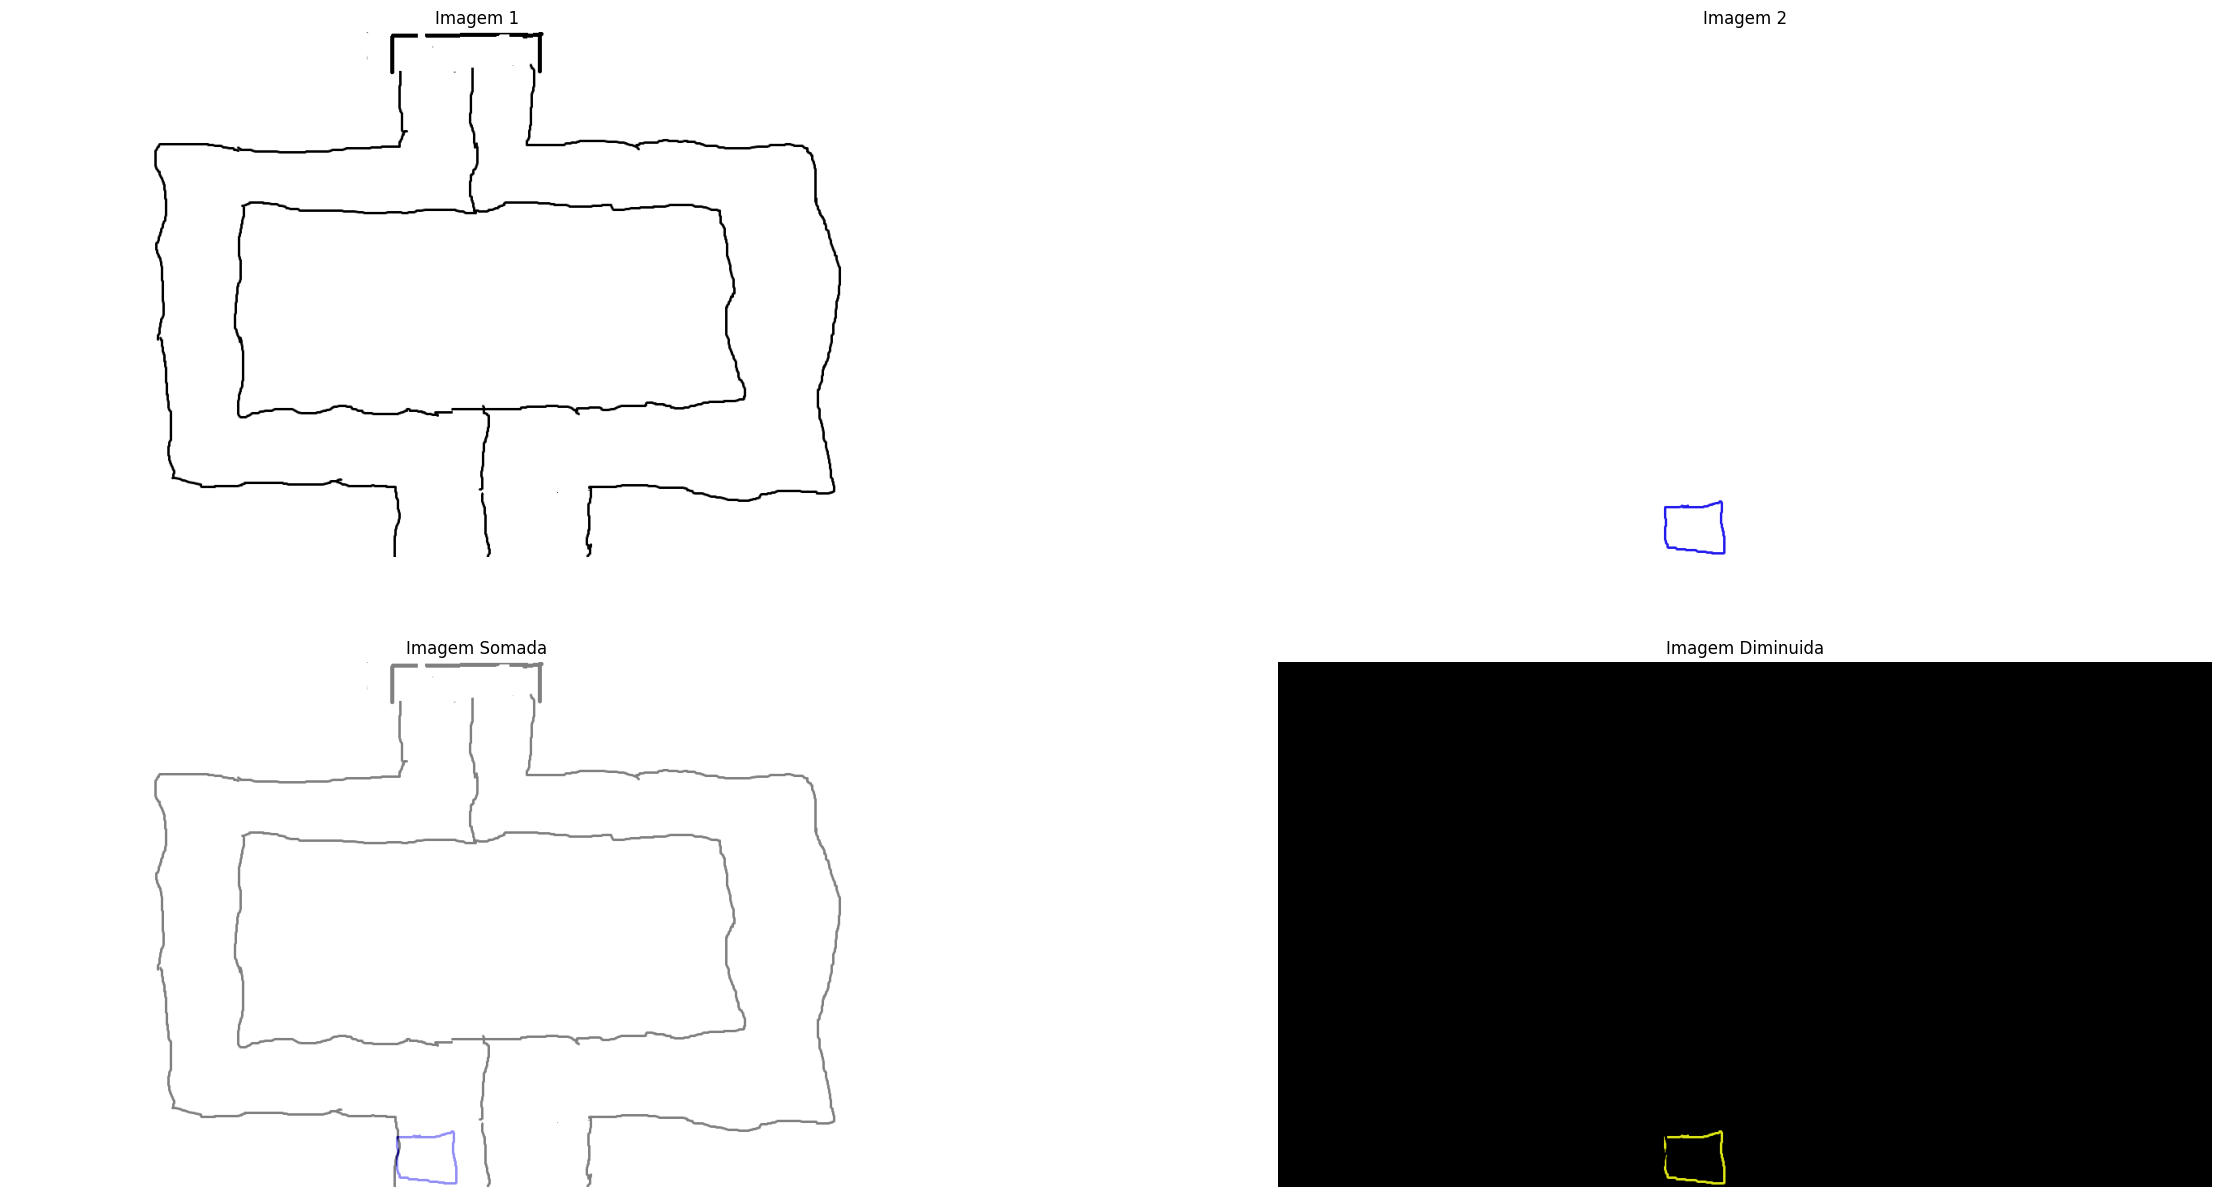

In [ ]:
image_1 = cv2.imread('circuito.png')
image_2 = cv2.imread('carro.png')


print(image_1.shape)
print(image_2.shape)

imagem_somada = cv2.addWeighted(image_1, 0.5, image_2, 0.5, 0)
imagem_sub = cv2.subtract(image_1, image_2)


plt.figure(figsize=(30, 15))
plt.subplot(2, 2, 1)
plt.imshow(image_1)
plt.axis("off")
plt.title("Imagem 1")


plt.subplot(2, 2, 2)
plt.imshow(image_2)
plt.axis("off")
plt.title("Imagem 2")

plt.subplot(2, 2, 3)
plt.imshow(imagem_somada)
plt.axis("off")
plt.title("Imagem Somada")

plt.subplot(2, 2, 4)
plt.imshow(imagem_sub)
plt.axis("off")
plt.title("Imagem Diminuida")

'''plt.subplot(1, 4, 2)
plt.imshow(imagem_sub)
plt.axis("off")
plt.title("Canal Diminuida")'''

# Operações bitwise em Imagens

(648, 1152, 3)
(648, 1152, 3)


Text(0.5, 1.0, 'Bit a bit de NOT')

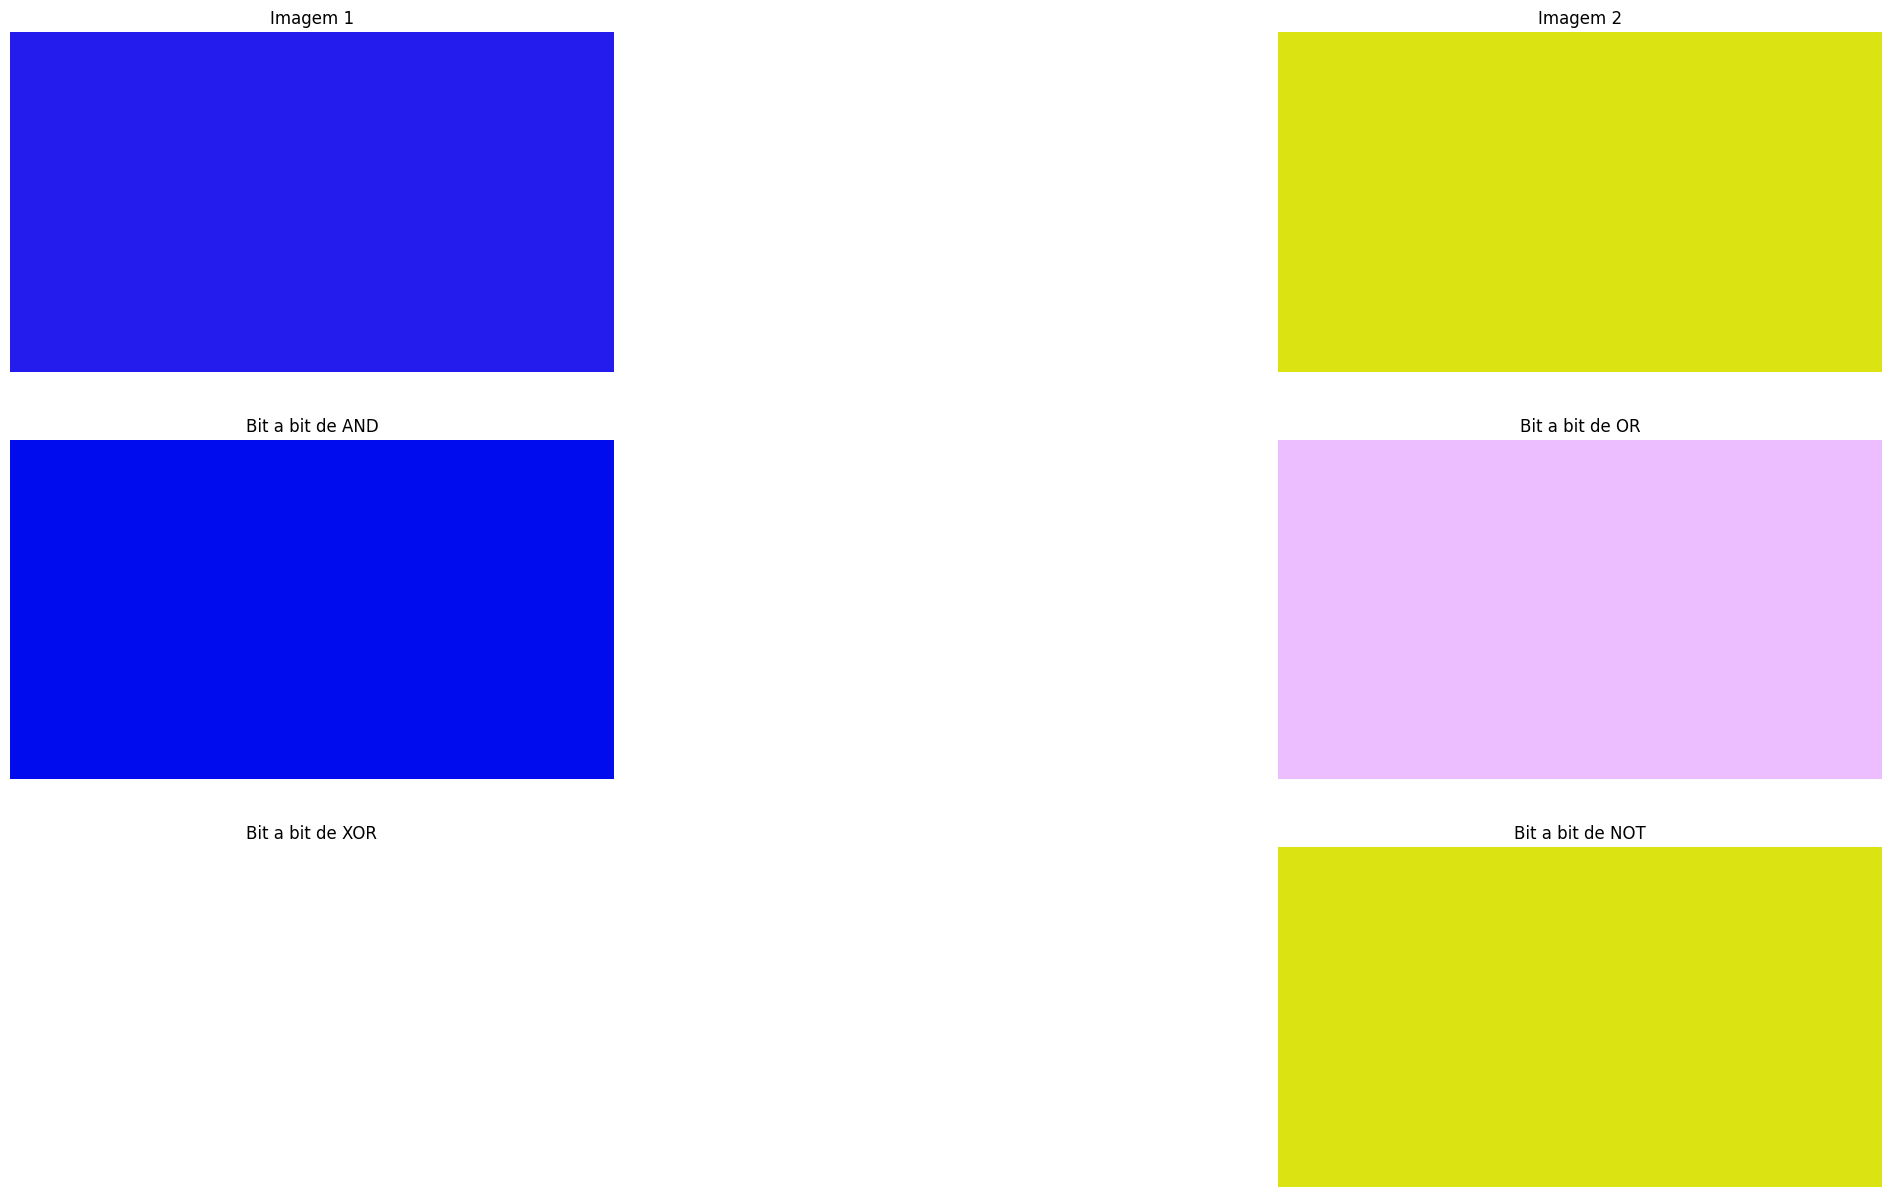

In [ ]:
image_1 = cv2.imread('vermelho.png')
image_2 = cv2.imread('rosa.png')


print(image_1.shape)
print(image_2.shape)

imagem_bit_and = cv2.bitwise_and(image_1, image_2, mask=None)
imagem_bit_or = cv2.bitwise_or(image_1, image_2, mask=None)
imagem_bit_not = cv2.bitwise_not(image_1, image_2, mask=None)
imagem_bit_xor = cv2.bitwise_xor(image_1, image_2, mask=None)

plt.figure(figsize=(30, 15))
plt.subplot(3, 2, 1)
plt.imshow(image_1)
plt.axis("off")
plt.title("Imagem 1")


plt.subplot(3, 2, 2)
plt.imshow(image_2)
plt.axis("off")
plt.title("Imagem 2")

plt.subplot(3, 2, 3)
plt.imshow(imagem_bit_and)
plt.axis("off")
plt.title("Bit a bit de AND")

plt.subplot(3, 2, 4)
plt.imshow(imagem_bit_or)
plt.axis("off")
plt.title("Bit a bit  de OR")

plt.subplot(3, 2, 5)
plt.imshow(imagem_bit_xor)
plt.axis("off")
plt.title("Bit a bit de XOR")

plt.subplot(3, 2, 6)
plt.imshow(imagem_bit_not)
plt.axis("off")
plt.title("Bit a bit de NOT")

# Canais


Canais Red


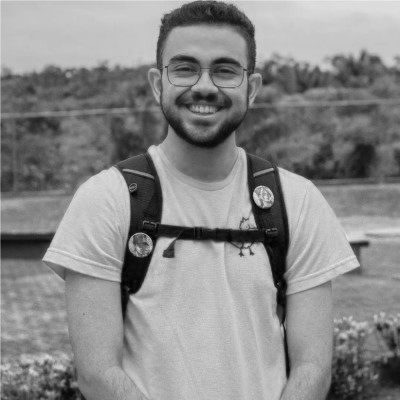

[[226 207 206 ... 230 230 230]
 [209 190 189 ... 218 218 218]
 [208 189 188 ... 220 220 220]
 ...
 [137  96  99 ... 102 101 101]
 [130  79  81 ... 103 105 108]
 [129  67  64 ... 104 109 114]]

Canais Green


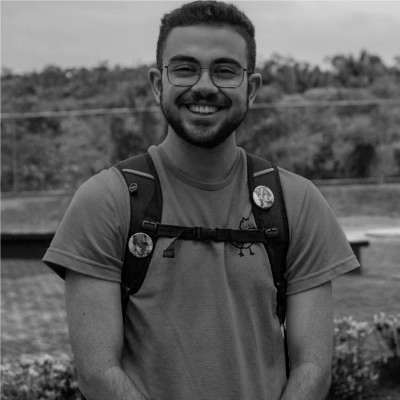

[[212 193 192 ... 221 221 221]
 [195 176 175 ... 209 209 209]
 [194 175 174 ... 211 211 211]
 ...
 [117  76  77 ...  62  61  61]
 [110  59  61 ...  62  63  66]
 [109  47  44 ...  63  67  72]]

Canais Blue


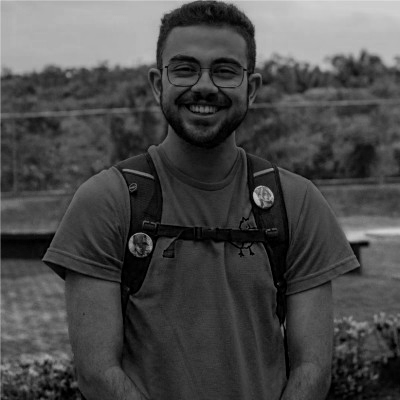

[[209 190 189 ... 216 216 216]
 [192 173 172 ... 204 204 204]
 [191 172 171 ... 204 204 204]
 ...
 [ 93  52  54 ...  37  36  36]
 [ 86  35  37 ...  40  39  42]
 [ 85  23  20 ...  41  43  48]]


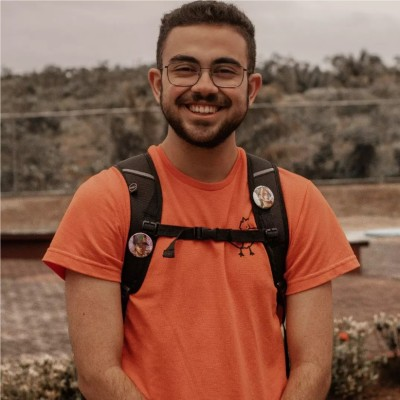

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from skimage import io
import numpy as np

url = "https://media.licdn.com/dms/image/D4D03AQEpCN6Xq_o3KA/profile-displayphoto-shrink_400_400/0/1670597520150?e=2147483647&v=beta&t=fEC2cih2_hMmF9_feEljDeumFUT94u9_ivrd99uyHeE"
img = io.imread(url)

red = img[..., 0]

green = img[..., 1]

blue = img[..., 2]

rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

print("\nCanais Red")
cv2_imshow(red)
print(red)

print("\nCanais Green")
cv2_imshow(green)
print(green)

print("\nCanais Blue")
cv2_imshow(blue)
print(blue)

merge = cv2.merge([blue, green, red])
cv2_imshow(merge)

# Referências

[1] Image Rotation. ScienceDirect. Disponível em: https://www.sciencedirect.com/topics/computer-science/image-rotation. Acessado em: 19 de agosto de 2024.

[2] YOUTUBE. Scaling Operations in Computer Vision. 2023. Disponível em: https://www.youtube.com/watch?v=uEaevJzZYhc. Acesso em: 19 ago. 2024.

[3] FISHER, Robert B. Scale Transformations. School of Informatics, University of Edinburgh, 1997. Disponível em: https://homepages.inf.ed.ac.uk/rbf/HIPR2/scale.htm. Acesso em: 19 ago. 2024.